Aplicando modelo Naive Bayes para determinar se um Indivíduo pode ter problemas cardiovasculares ou não, baseado em certos parâmetros

Dataset obtido no Kaggle ([https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas](https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas))

| DADOS |

- age -> Idade do Indivíduo. (Integer)
- gender -> Gênero do Indivíduo. (String)
- height -> Tamanho do Indivíduo em CM. (Integer)
- weight -> Peso do Indivíduo em KG. (Integer)
- ap_hi -> Leitura da Pressão Sistólica. (Integer)
- ap_lo -> Leitura da Pressão Diastólica. (Integer)
- cholesterol -> Nível de colesterol do Indivíduo. (Integer)
- gluc -> Nível de glucose do Indivíduo. (Integer)
- smoke -> Status de Fumante do Indivíduo. (Boolean -> 0 | 1)
- alco -> Consumo de álcool do Indivíduo. (Boolean -> 0 | 1)
- active -> Nível de atividade física do Indivíduo. (Boolean -> 0 | 1)
- cardio -> Presença ou falta de problemas cardiovasculares. (Boolean -> 0 | 1)

In [1]:
# Conjunto de Importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('data/d1-heart_data.csv')           # lendo o .csv

In [3]:
dados.head()            # vendo o cabeçalho do .csvv

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
colunas = dados.columns         # atribuição das colunas a uma variável

In [5]:
dados = dados.drop(['id', 'index'], axis=1)         # drop das colunas id e index, para facilitar a convergência do modelo

In [6]:
# Criação de uma nova feature, que poderá ajudar o modelo a classificar (IMC)
dados['bmi'] = dados['weight'] / ((dados['height'] / 100) ** 2)         # cálculo de IMC

dados = dados[~np.isinf(dados['bmi'])]          # remoção de valores infinitos

In [7]:
# Transformando a coluna categórica GENDER de (1:HOMEM e 2:MULHER para 0:HOMEM e 1:MULHER)
dados['gender'] = dados['gender'].apply(lambda x: 1 if x == 2 else 0)

NORMALIZAÇÃO DOS DADOS

In [8]:
from sklearn.preprocessing import MinMaxScaler          # importação do sklearn para usar MinMax

In [9]:
normalizador = MinMaxScaler(feature_range=(0,1))            # função MinMax para criação de um normalizador

In [10]:
'''
| NORMALIZAÇÃO FEITA ANTERIORMENTE -> COM 59% DE ACCURACY NO GAUSSIAN |

colunas_para_normalizar = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']

for col in colunas_para_normalizar:
    dados[col] = normalizador.fit_transform(dados[[col]])
dados.head()
'''

# Aplicar transformação logarítmica em colunas contínuas (adicionando 1 para evitar log(0))
for col in ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']:
    dados[col] = np.log1p(dados[col])

# Normalizar novamente após a transformação log
dados[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']] = normalizador.fit_transform(dados[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']])
dados = dados.dropna()          # drop nos NaN's
dados.head()

c:\Users\PC\Documents\GitHub\Extracao-de-Conhecimento-e-Minera--o-de-Dados\venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0.677044,1,0.736315,0.600686,0.446835,0.472230,1,1,0,0,1,0,0.389137
1,0.797933,0,0.687216,0.707801,0.473450,0.484739,3,1,0,0,1,1,0.495548
2,0.708715,0,0.724375,0.611443,0.465266,0.458070,3,1,0,0,0,1,0.404578
3,0.622681,1,0.740248,0.695580,0.481073,0.495943,1,1,0,0,1,1,0.450360
4,0.611887,0,0.687216,0.566239,0.436332,0.441757,1,1,0,0,0,0,0.399710


Separando em amostra de treino e teste

In [11]:
from sklearn.model_selection import train_test_split            # importação do "train_test_split" do sklearn para realizar o treinamento

In [12]:
X = dados.drop('cardio', axis=1)  #  ('cardio' é a coluna alvo)
Y = dados['cardio']  # Variável alvo

In [13]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.30, random_state=0)

Aplicando modelo Naive-Bayes (Gaussiano; Bernoulli e Multinomial)

## MODELO GAUSSIANO

In [14]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB,MultinomialNB           # importação do sklearn para utilização dos modelos

In [15]:
modelo_gaussiano = GaussianNB()          # modelo gaussiano (Naivy Bayes)

In [16]:
modelo_gaussiano.fit(X_treino,Y_treino)          # treinamento do modelo com dados de treino

GaussianNB()

Realizando previsões na amostra de teste

In [17]:
Y_previsto = modelo_gaussiano.predict(X_teste)           # realização de previsões com a amostra de teste

Gerando matriz de confusão

In [18]:
from sklearn.metrics import confusion_matrix            # importação do "confusion_matrix" do Sklearn para gerar a matriz de confusão

In [19]:
confusion_matrix_gaussiano = confusion_matrix(Y_teste,Y_previsto)            # Utilização do método confusion_matrix(), com os dados de teste e dados previstos

<Axes: >

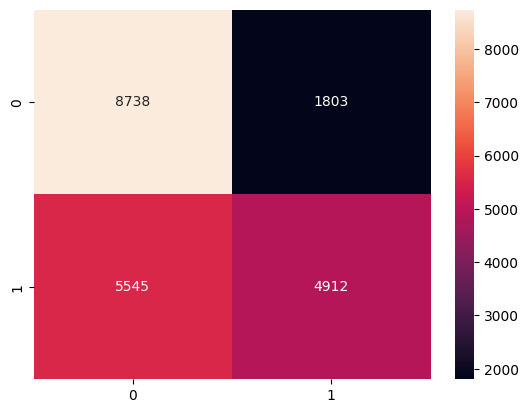

In [20]:
sns.heatmap(confusion_matrix_gaussiano,annot=True, fmt="d")            # criação do heatmap

In [21]:
modelo_gaussiano.score(X_treino,Y_treino)            # Score do modelo no treino -> 65%

0.6513654733232641

In [22]:
modelo_gaussiano.score(X_teste,Y_teste)          # score do modelo no teste -> 65%

0.6500619106581579

## MODELO BERNOULLI

In [23]:
modelo_bernoulli = BernoulliNB()         # modelo Bernoulli (Naive Bayes)

In [24]:
modelo_bernoulli.fit(X_treino,Y_treino)          # treinamento do modelo com dados de treino 

BernoulliNB()

In [25]:
Y_previsto2 = modelo_bernoulli.predict(X_teste)          # realização de previsões com a amostra de teste

In [26]:
confusion_matrix_bernoulli = confusion_matrix(Y_teste,Y_previsto2)           # Utilização do método confusion_matrix(), com os dados de teste e dados previstos

<Axes: >

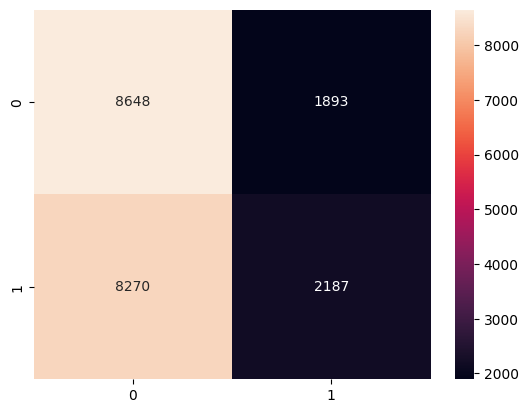

In [27]:
sns.heatmap(confusion_matrix_bernoulli,annot=True, fmt="d")            # criação do heatmap

In [28]:
modelo_bernoulli.score(X_treino,Y_treino)            # Score do modelo no treino -> 51%

0.5130832346817977

In [29]:
modelo_bernoulli.score(X_teste,Y_teste)          # Score do modelo no teste -> 51%

0.5160015239546624

## MODELO MULTINOMIAL

In [30]:
modelo_multinomial = MultinomialNB()            # modelo Multinomial (Naive Bayes)

In [31]:
modelo_multinomial.fit(X_treino,Y_treino)          # treinamento do modelo com dados de treino

MultinomialNB()

In [32]:
Y_previsto2 = modelo_multinomial.predict(X_teste)          # realização de previsões com a amostra de teste

In [33]:
confusion_matrix_multinomial = confusion_matrix(Y_teste,Y_previsto2)           # Utilização do método confusion_matrix(), com os dados de teste e dados previstos

<Axes: >

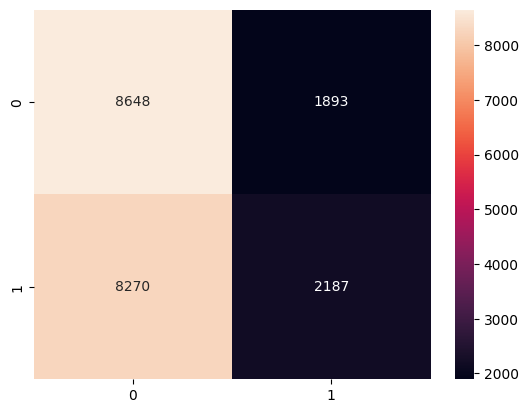

In [34]:
sns.heatmap(confusion_matrix_bernoulli,annot=True, fmt="d")            # criação do heatmap

In [35]:
modelo_multinomial.score(X_treino,Y_treino)            # Score do modelo no treino -> 58%

0.5800914397681348

In [36]:
modelo_multinomial.score(X_teste,Y_teste)          # Score do modelo no teste -> 58%

0.5813410801028669

### RESULTADOS:
- Naive Bayes Gaussiano     -> 65%
- Naive Bayes Bernoulli     -> 51%
- Naive Bayes Multinomial   -> 58%